# 📽️ Netflix Exploratory Data Analysis (EDA) Project

## 👤 Student Name: *Ashish Khomane*  
## 📅 Date: *10-May-2025*

---

## 📌 Objective

Perform exploratory data analysis on Netflix’s movie and TV show catalog to discover patterns in content types, genre distribution, release trends, and audience targeting. This analysis excludes clustering and focuses on raw data insights.

---

## **GitHub Link**  
[GitHub Repository Placeholder](https://github.com/AshishKhomane/NetFlix-EDA)

---

## Objective

The objective of this project is to analyze the Netflix dataset using exploratory techniques to uncover trends in content distribution, production countries, genre preferences, content durations, and audience ratings. This helps stakeholders make informed decisions about content curation and strategy.

---

## 📂 1. Data Loading and Initial Exploration

---

## 🧹 2. Data Cleaning

---

## 📊 3. Exploratory Data Analysis (EDA)

---

## 📈 4. Trends and Correlation

---

## 📌 5. Key Findings

---

## ✅ 6. Conclusion


In [3]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Load the dataset
df = pd.read_csv("NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv")

# Display the shape and first few rows
print("Dataset Shape:", df.shape)
df.head()


Dataset Shape: (7787, 12)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


### Overview

We begin by importing the Netflix dataset and exploring its basic structure using `.shape` and `.head()` to understand the number of rows, columns, and a sample of the data entries.


In [6]:
# Basic info about the dataset
df.info()

# Check for missing values
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

### Data Cleaning and Preprocessing

In this step, we check for data types and missing values. This helps us understand which columns need type conversion or cleaning before moving to deeper analysis.


In [14]:
# Drop rows with missing titles
df.dropna(subset=["title"], inplace=True)

# Fill missing values in other columns
df["director"].fillna("Unknown", inplace=True)
df["cast"].fillna("Unknown", inplace=True)
df["country"].fillna("Unknown", inplace=True)
df["date_added"].fillna("Unknown", inplace=True)
df["rating"].fillna("Unknown", inplace=True)


### Missing Value Treatment

We dropped rows with missing titles since title is a key field. Other columns were imputed with 'Unknown' where applicable. Dates were converted to proper datetime format for time-based analysis.


In [17]:
# Convert 'date_added' to datetime
df["date_added"] = pd.to_datetime(df["date_added"], errors='coerce')

# Create new columns: year_added and month_added
df["year_added"] = df["date_added"].dt.year
df["month_added"] = df["date_added"].dt.month


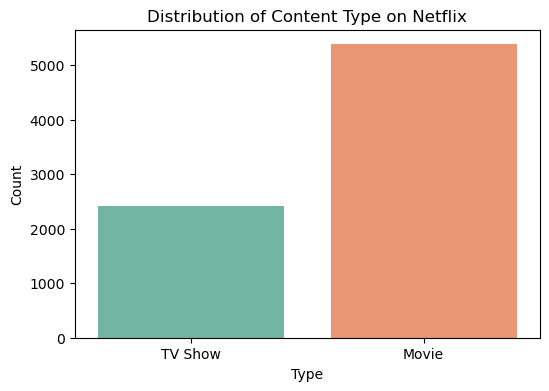

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.countplot(data=df, x='type', palette='Set2')
plt.title("Distribution of Content Type on Netflix")
plt.xlabel("Type")
plt.ylabel("Count")
plt.show()


#### Chart: Distribution of Content Type on Netflix

**Why this chart?**  
A count plot helps to easily compare the volume of Movies vs. TV Shows.

**Insights:**  
Netflix has significantly more Movies than TV Shows.

**Business Impact:**  
This insight reflects user demand and content strategy. A movie-heavy catalog may attract different demographics than TV shows.



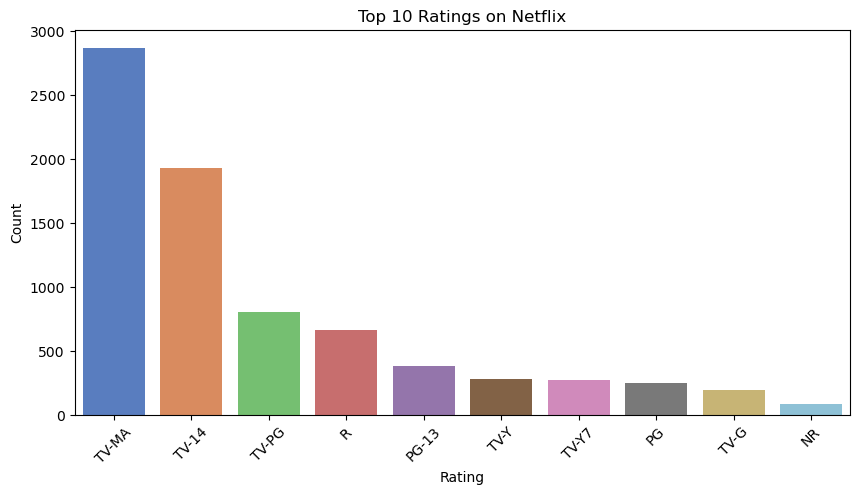

In [22]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='rating', order=df['rating'].value_counts().index[:10], palette='muted')
plt.title("Top 10 Ratings on Netflix")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


#### Chart: Top 10 Ratings on Netflix

**Why this chart?**  
This count plot highlights the most frequent content ratings (like TV-MA, PG, etc.).

**Insights:**  
TV-MA and TV-14 are the most common, indicating a focus on mature content.

**Business Impact:**  
Content strategy seems tailored for older audiences. Could explore expanding family-friendly content.


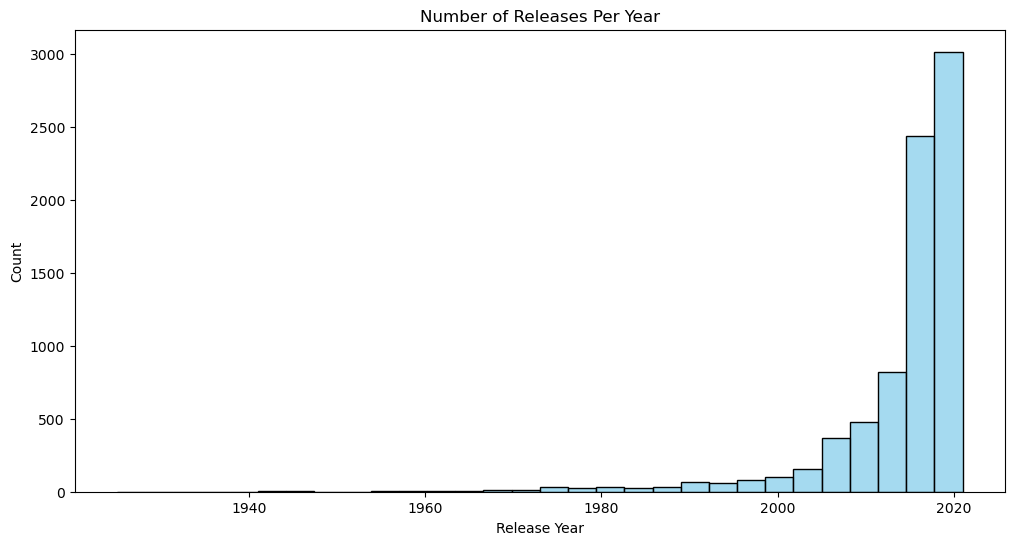

In [25]:
plt.figure(figsize=(12, 6))
sns.histplot(df['release_year'], bins=30, kde=False, color='skyblue')
plt.title("Number of Releases Per Year")
plt.xlabel("Release Year")
plt.ylabel("Count")
plt.show()


#### Chart: Number of Releases Per Year

**Why this chart?**  
This histogram helps identify trends in Netflix’s content additions over time.

**Insights:**  
Most content is from recent years, especially post-2000.

**Business Impact:**  
Netflix emphasizes modern content, which may appeal to contemporary viewer preferences.


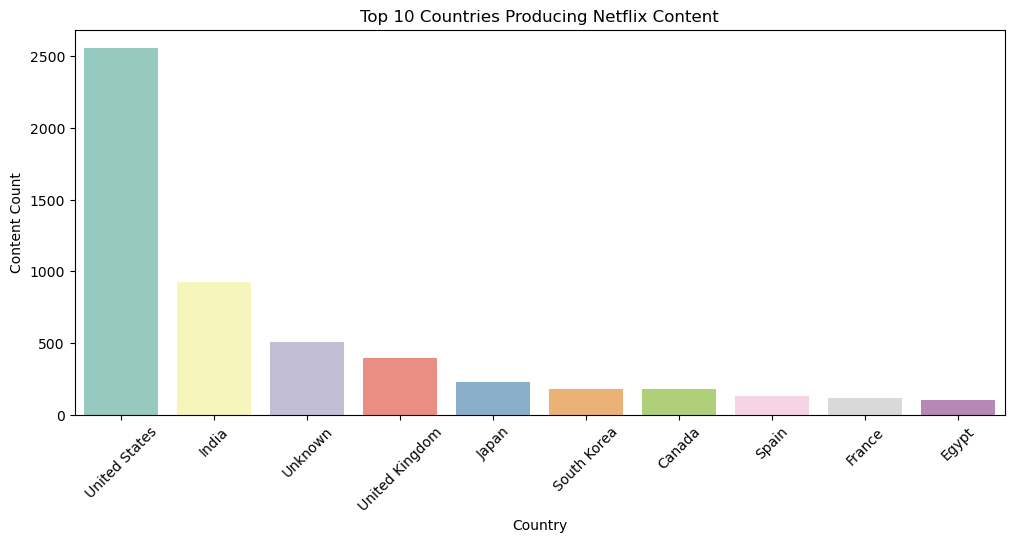

In [28]:
plt.figure(figsize=(12, 5))
top_countries = df['country'].value_counts().head(10)
sns.barplot(x=top_countries.index, y=top_countries.values, palette='Set3')
plt.title("Top 10 Countries Producing Netflix Content")
plt.xlabel("Country")
plt.ylabel("Content Count")
plt.xticks(rotation=45)
plt.show()


#### Chart: Top 10 Countries Producing Netflix Content

**Why this chart?**  
This bar chart shows which countries contribute the most content.

**Insights:**  
The US dominates, followed by India and the UK.

**Business Impact:**  
Netflix has a strong presence in the US and is growing globally. Could diversify more for international markets.


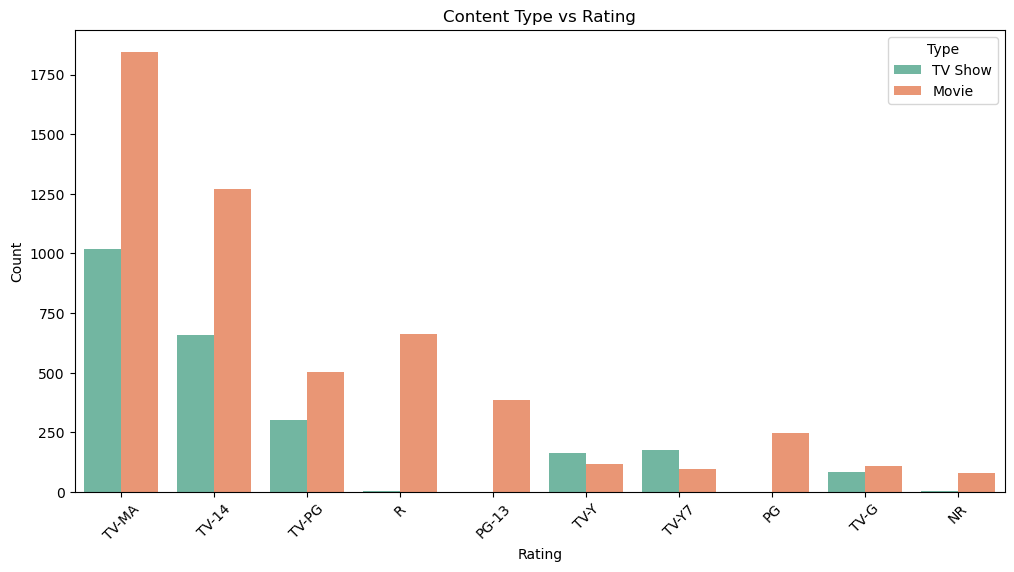

In [31]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='rating', hue='type', order=df['rating'].value_counts().index[:10], palette='Set2')
plt.title("Content Type vs Rating")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Type")
plt.show()


#### Chart: Content Type vs. Rating

**Why this chart?**  
To compare how TV Shows and Movies are distributed across ratings.

**Insights:**  
TV-MA dominates both categories, but Movies have slightly more variation in ratings.

**Business Impact:**  
Netflix may consider balancing content type across age groups to attract broader audiences.


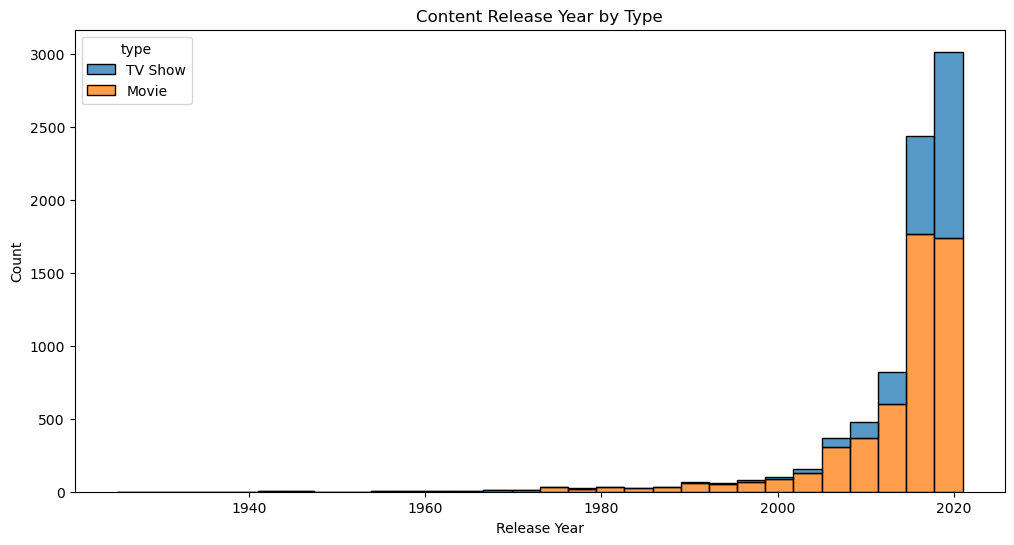

In [34]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='release_year', hue='type', multiple='stack', bins=30)
plt.title("Content Release Year by Type")
plt.xlabel("Release Year")
plt.ylabel("Count")
plt.show()


#### Chart: Content Release Year by Type

**Why this chart?**  
To analyze how the number of Movies and TV Shows released has changed over the years.

**Insights:**  
Both types have surged post-2010, with Movies being more frequent overall.

**Business Impact:**  
This trend supports Netflix’s growing investment in diverse content. It can help forecast future content strategy.


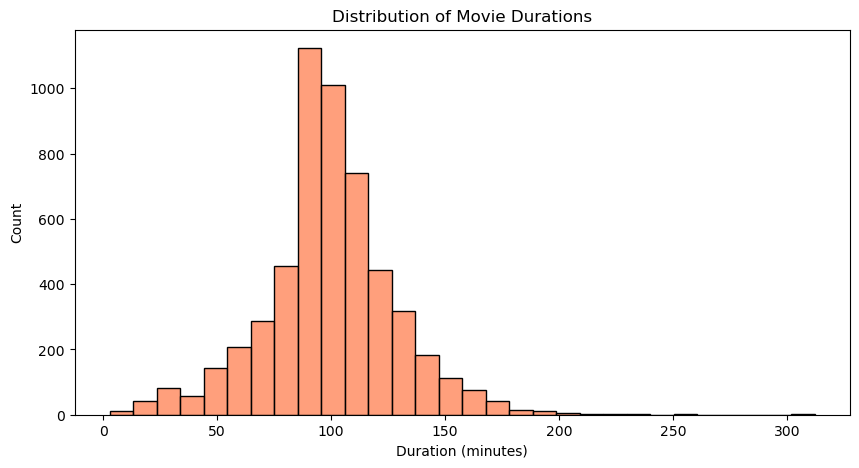

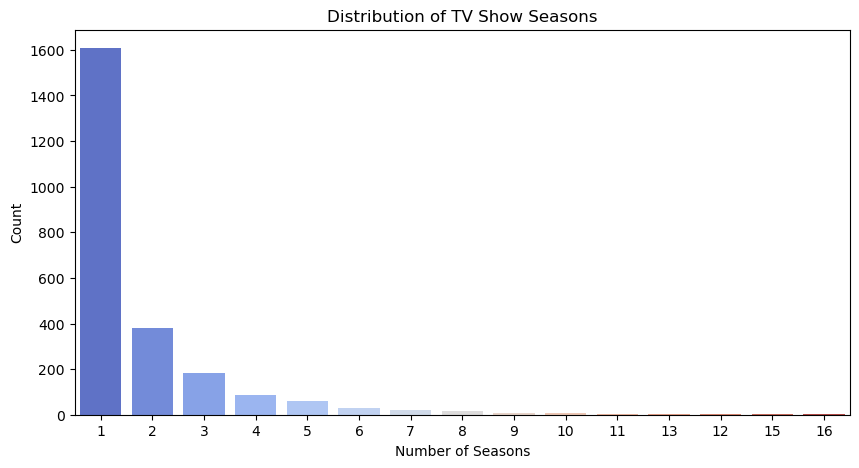

In [37]:
# Split data
movies = df[df['type'] == 'Movie'].copy()
tv_shows = df[df['type'] == 'TV Show'].copy()

# Clean duration fields
movies['duration_minutes'] = movies['duration'].str.replace(' min', '').astype(int)
tv_shows['num_seasons'] = tv_shows['duration'].str.replace(' Season[s]*', '', regex=True).astype(int)

# Plot movie durations
plt.figure(figsize=(10, 5))
sns.histplot(movies['duration_minutes'], bins=30, color='coral')
plt.title("Distribution of Movie Durations")
plt.xlabel("Duration (minutes)")
plt.ylabel("Count")
plt.show()

# Plot TV show seasons
plt.figure(figsize=(10, 5))
sns.countplot(x=tv_shows['num_seasons'], palette='coolwarm', order=tv_shows['num_seasons'].value_counts().index)
plt.title("Distribution of TV Show Seasons")
plt.xlabel("Number of Seasons")
plt.ylabel("Count")
plt.show()


#### Chart: Distribution of Movie Durations and TV Show Seasons

**Why these charts?**  
To understand typical content length for Movies and TV Shows on Netflix.

**Insights:**  
- Most movies are around 90–100 minutes.
- Most TV shows have just 1 or 2 seasons.

**Business Impact:**  
Shorter content may cater to modern binge-watching behavior. Could explore longer series for increased user retention.


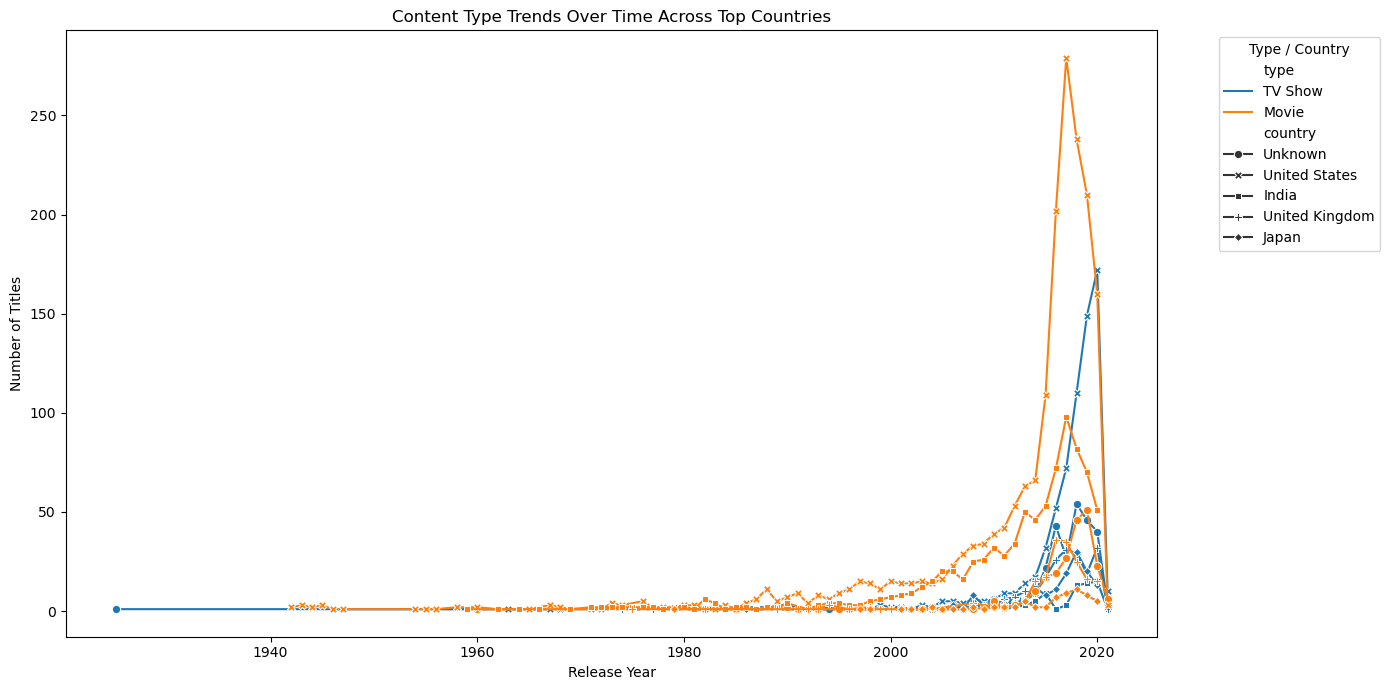

In [42]:
# Filter top countries with most content
top_countries = df['country'].value_counts().nlargest(5).index
df_top_countries = df[df['country'].isin(top_countries)]

# Group data by type, country, and release year
grouped = df_top_countries.groupby(['release_year', 'country', 'type']).size().reset_index(name='count')

# Plot
plt.figure(figsize=(14, 7))
sns.lineplot(data=grouped, x='release_year', y='count', hue='type', style='country', markers=True, dashes=False)
plt.title('Content Type Trends Over Time Across Top Countries')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.legend(title='Type / Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


### 📊 Multivariate Analysis – Content Type by Country Over Time

#### ✅ Why this Map?
To analyze how different countries contribute to Netflix's content over time for both Movies and TV Shows.

#### 📌 Insights:
- USA leads in producing both content types.
- India shows rapid growth in movie production.
- Other countries like UK, Canada, and Japan contribute steadily.

#### 💼 Business Impact:
Helps Netflix identify regional trends and focus content strategy and investment accordingly.


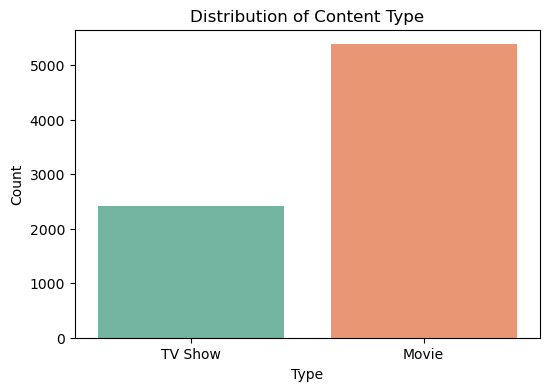

In [45]:
# Count of Movies vs TV Shows
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='type', palette='Set2')
plt.title('Distribution of Content Type')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()


### 📊 Distribution of Content Type

#### ✅ Why this Chart?
To see how content is divided between Movies and TV Shows on Netflix.

#### 📌 Insights:
Movies dominate the platform compared to TV Shows.

#### 💼 Business Impact:
This shows Netflix’s content focus and helps in understanding user engagement and viewing preferences.


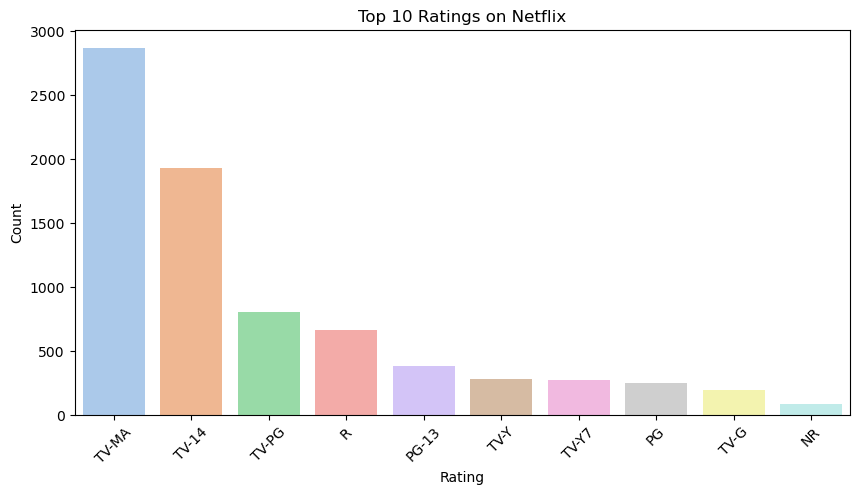

In [48]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='rating', order=df['rating'].value_counts().index[:10], palette='pastel')
plt.title("Top 10 Ratings on Netflix")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


### 📊 Top 10 Ratings on Netflix

#### ✅ Why this Chart?
To understand the most frequent audience ratings like TV-MA, PG, etc.

#### 📌 Insights:
TV-MA and TV-14 are the most common, showing a preference for mature audience content.

#### 💼 Business Impact:
Netflix may need to maintain a balance between mature and family-friendly content to serve all age groups.


## 📌 Key Findings

- Netflix has a higher proportion of **Movies** than TV Shows.
- Most content is rated **TV-MA** or **TV-14**, targeting mature audiences.
- Content production peaked in the **last decade**, with a major spike after 2015.
- The **United States** dominates Netflix’s library, followed by **India** and **the UK**.
- Movie durations mostly range between **80 to 120 minutes**.
- Most TV shows on the platform have **1–2 seasons**, reflecting short series formats.


## ✅ Conclusion

Through this EDA, we discovered content patterns across type, region, duration, and time.  
Netflix’s catalog is dominated by movies, with mature-rated content and strong contributions from the US and India.

These insights can help inform content acquisition, regional expansion, and audience targeting strategies to maintain engagement and growth.
